In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Dense, Dropout, Flatten, Reshape, TimeDistributed
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [ ]:
# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Parameters for audio processing
SAMPLE_RATE = 16000
DURATION = 1  # seconds
N_MFCC = 13
N_MELS = 40
HOP_LENGTH = 512
N_FFT = 2048
MAX_LEN = 88  # Adjust based on your audio duration


In [ ]:
# Download the dataset
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz

# Create a directory and extract the dataset
!mkdir speech_commands && tar -xvzf speech_commands_v0.01.tar.gz -C speech_commands

Streaming output truncated to the last 5000 lines.
./up/6f9088d7_nohash_0.wav
./up/6f342826_nohash_0.wav
./up/e0a7c5a0_nohash_0.wav
./up/4d4e17f5_nohash_1.wav
./up/b0f24c9b_nohash_0.wav
./up/735845ab_nohash_2.wav
./up/53d5b86f_nohash_0.wav
./up/1a5b9ca4_nohash_1.wav
./up/23abe1c9_nohash_2.wav
./up/bdee441c_nohash_1.wav
./up/a1cff772_nohash_1.wav
./up/1ecfb537_nohash_3.wav
./up/37fc5d97_nohash_3.wav
./up/bd8412df_nohash_1.wav
./up/e53139ad_nohash_1.wav
./up/10ace7eb_nohash_3.wav
./up/30065f33_nohash_0.wav
./up/eefd26f3_nohash_0.wav
./up/c9b653a0_nohash_2.wav
./up/02746d24_nohash_0.wav
./up/e1469561_nohash_0.wav
./up/4bba14ce_nohash_0.wav
./up/b5d1e505_nohash_1.wav
./up/531a5b8a_nohash_1.wav
./up/0135f3f2_nohash_0.wav
./up/dbb40d24_nohash_4.wav
./up/e9287461_nohash_1.wav
./up/71e6ab20_nohash_0.wav
./up/ead2934a_nohash_1.wav
./up/f9af0887_nohash_0.wav
./up/ff63ab0b_nohash_0.wav
./up/f3d06008_nohash_0.wav
./up/918a2473_nohash_4.wav
./up/e54a0f16_nohash_0.wav
./up/cb8f8307_nohash_1.wav
./up

In [ ]:
import os
# Path to dataset
data_path = "speech_commands"

# Count number of audio files
num_files = sum([len(files) for _, _, files in os.walk(data_path)])

print("Total number of rows (audio files):", num_files)

Total number of rows (audio files): 64732


Loading data...
Processing 1713 files for command 'bed'
Processing 1731 files for command 'bird'
Processing 1733 files for command 'cat'
Processing 1746 files for command 'dog'
Processing 2359 files for command 'down'
Processing 2352 files for command 'eight'
Processing 2357 files for command 'five'
Processing 2372 files for command 'four'
Processing 2372 files for command 'go'
Processing 1742 files for command 'happy'
Processing 1750 files for command 'house'
Processing 2353 files for command 'left'
Processing 1746 files for command 'marvin'
Processing 2364 files for command 'nine'
Processing 2375 files for command 'no'
Processing 2357 files for command 'off'
Processing 2367 files for command 'on'
Processing 2370 files for command 'one'
Processing 2367 files for command 'right'
Processing 2377 files for command 'seven'
Processing 1734 files for command 'sheila'
Processing 2369 files for command 'six'
Processing 2380 files for command 'stop'
Processing 2356 files for command 'three'
Pr

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 81, 40)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_7 (Conv1D)         │ (None, 81, 64)         │         12,864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 81, 64)         │            256 │ conv1d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_6 (Activation) │ (None, 81, 64)         │              0 │ batch_normalization_8… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_3           │ (None, 40, 64)         │              0 │ activation_6[0][0]     │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)       │ (None, 40, 64)         │              0 │ max_pooling1d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_9 (Conv1D)         │ (None, 40, 128)        │         41,088 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 40, 128)        │            512 │ conv1d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_7 (Activation) │ (None, 40, 128)        │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_10 (Conv1D)        │ (None, 40, 128)        │         82,048 │ activation_7[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_8 (Conv1D)         │ (None, 40, 128)        │          8,320 │ dropout_6[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 40, 128)        │            512 │ conv1d_10[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 40, 128)        │            512 │ conv1d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 40, 128)        │              0 │ batch_normalization_1… │
│                           │                        │                │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_8 (Activation) │ (None, 40, 128)        │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d_4           │ (None, 20, 128)        │              0 │ activation_8[0][0]     │
│ (MaxPooling1D)       

 Total params: 1,415,391 (5.40 MB)

 Trainable params: 1,411,935 (5.39 MB)

 Non-trainable params: 3,456 (13.50 KB)


Training model...
Epoch 1/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 316s 243ms/step - accuracy: 0.2259 - loss: 2.8285 - precision_1: 0.5017 - recall_1: 0.1098 - val_accuracy: 0.7590 - val_loss: 0.7909 - val_precision_1: 0.8226 - val_recall_1: 0.7152 - learning_rate: 0.0010
Epoch 2/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 323s 244ms/step - accuracy: 0.7173 - loss: 0.9525 - precision_1: 0.8071 - recall_1: 0.6450 - val_accuracy: 0.8769 - val_loss: 0.4167 - val_precision_1: 0.9153 - val_recall_1: 0.8585 - learning_rate: 0.0010
Epoch 3/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 288s 237ms/step - accuracy: 0.8132 - loss: 0.6370 - precision_1: 0.8753 - recall_1: 0.7765 - val_accuracy: 0.9057 - val_loss: 0.3257 - val_precision_1: 0.9390 - val_recall_1: 0.8900 - learning_rate: 0.0010
Epoch 4/10
1214/1214 ━━━━━━━━━━━━━━━━━━━━ 287s 236ms/step - accuracy: 0.8552 - loss: 0.4987 - precision_1: 0.9050 - recall_1: 0.8273 - val_accuracy: 0.9074 - val_loss: 0.3284 - val_precision_1: 0.9409 - val_recall_1: 0.8922 - learning_ra

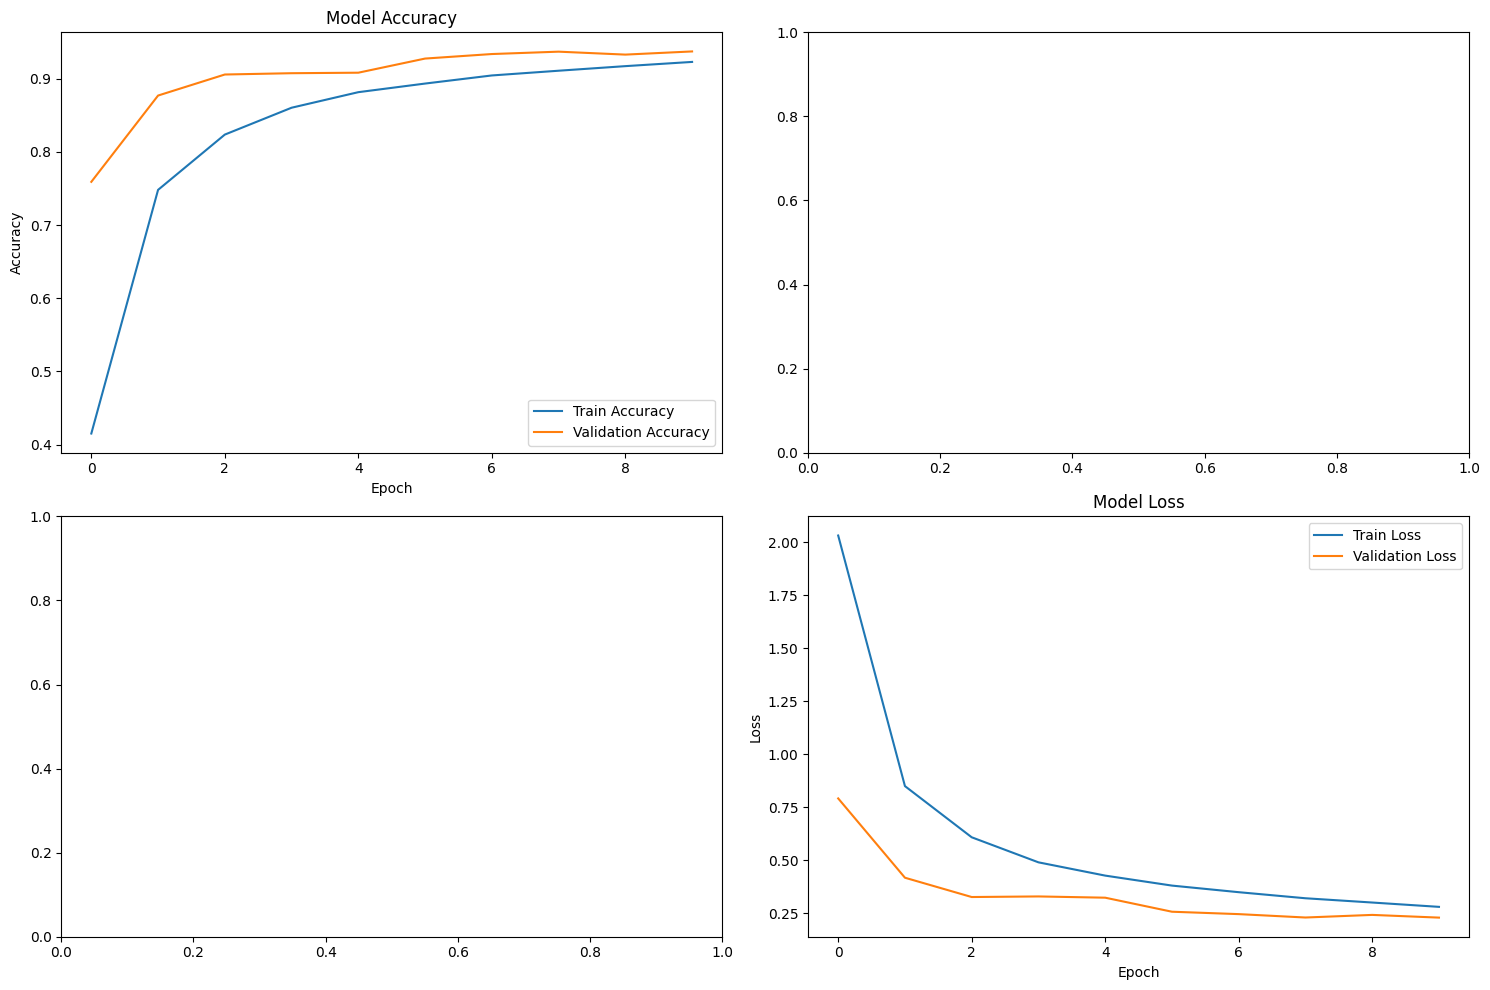

405/405 ━━━━━━━━━━━━━━━━━━━━ 25s 58ms/step

Classification Report:
              precision    recall  f1-score   support

         bed       0.93      0.94      0.93       343
        bird       0.98      0.91      0.94       346
         cat       0.97      0.95      0.96       347
         dog       0.96      0.96      0.96       349
        down       0.93      0.94      0.94       472
       eight       0.91      0.97      0.94       470
        five       0.94      0.94      0.94       471
        four       0.98      0.93      0.95       475
          go       0.94      0.85      0.89       474
       happy       0.97      0.99      0.98       348
       house       0.95      0.98      0.96       350
        left       0.95      0.95      0.95       471
      marvin       0.99      0.96      0.97       349
        nine       0.85      0.96      0.90       473
          no       0.91      0.93      0.92       475
         off       0.90      0.94      0.92       471
          on  

Model saved as 'speech_command_model.h5'


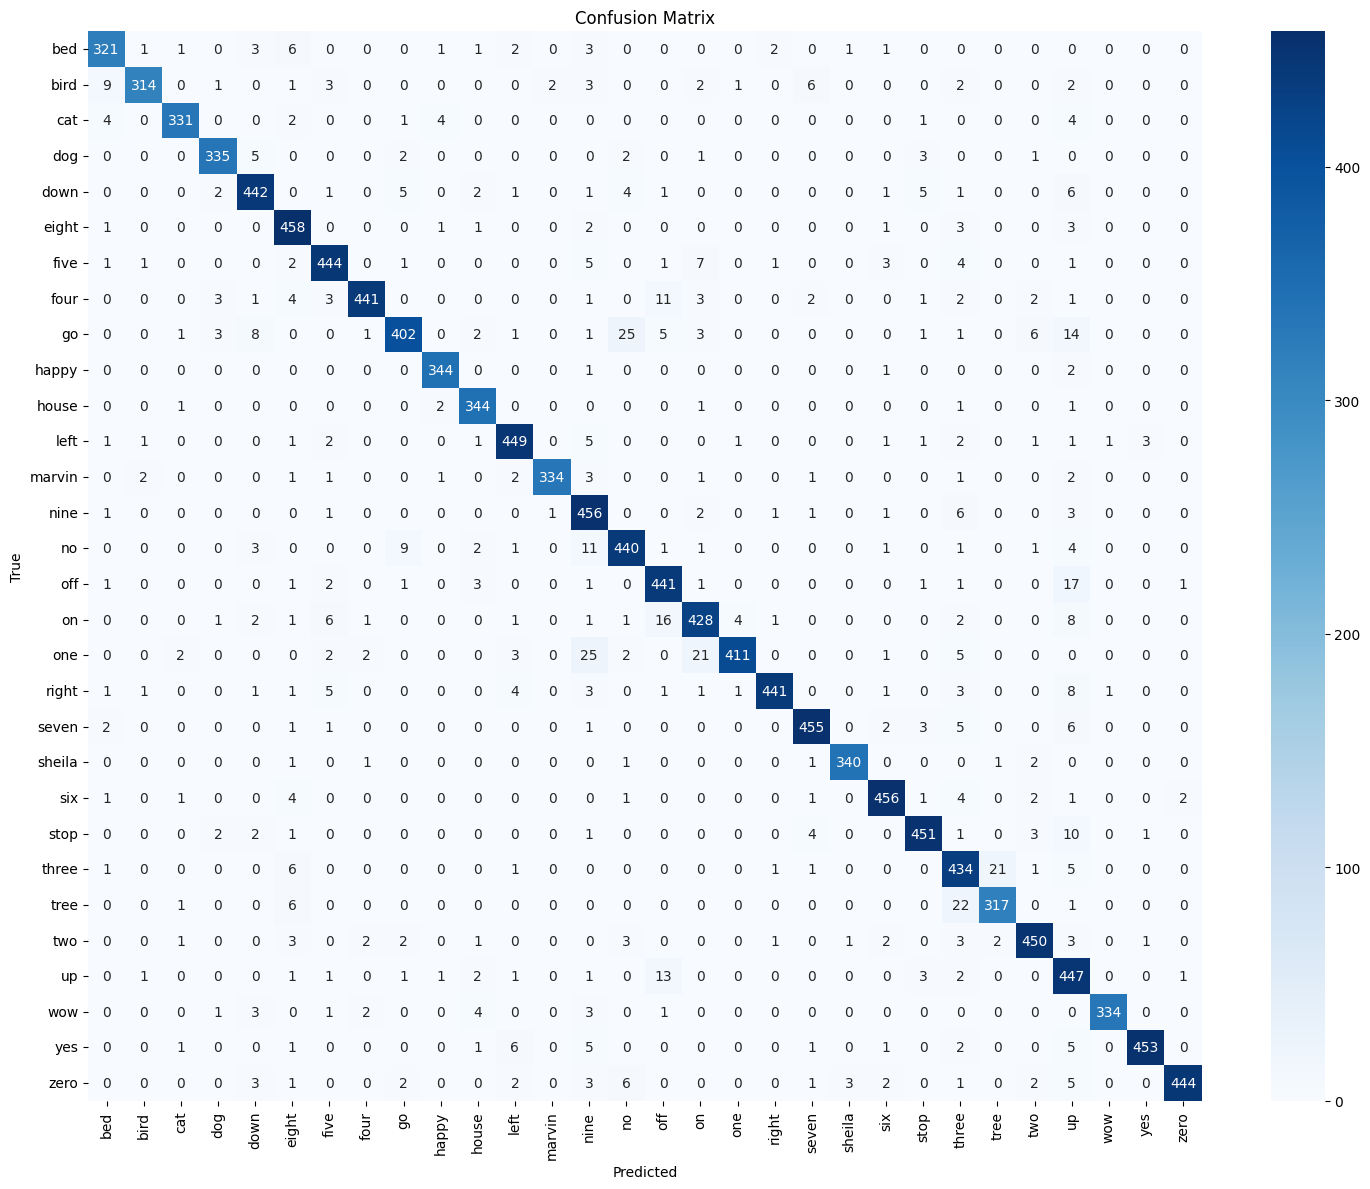

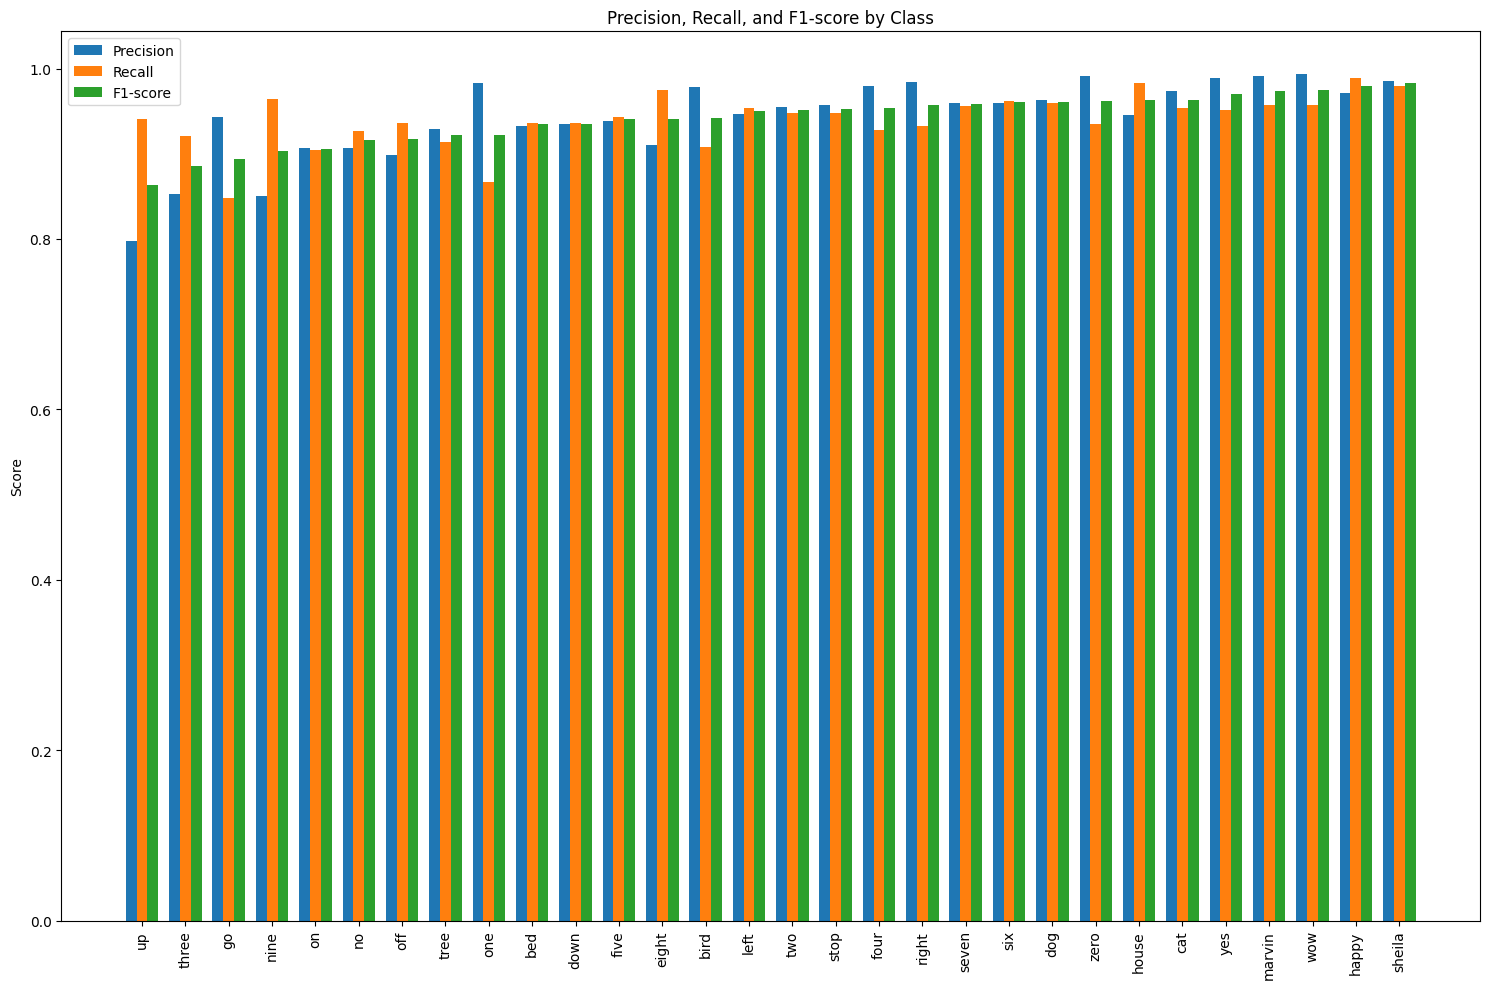

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import warnings
warnings.filterwarnings('ignore')

# Set seed for reproducibility
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Parameters
SAMPLE_RATE = 16000
DURATION = 1.0  # seconds
SAMPLES = int(SAMPLE_RATE * DURATION)
N_MFCC = 40
N_FFT = 512
HOP_LENGTH = 200
N_MELS = 128
DATA_PATH = 'speech_commands'

# Excluded folders (not speech commands)
EXCLUDED_FOLDERS = ['_background_noise_', 'README.md', 'LICENSE', 'testing_list.txt', 'validation_list.txt']

def extract_features(file_path, feature_type='mfcc'):
    """Extract audio features from file"""
    try:
        # Load audio file
        audio, _ = librosa.load(file_path, sr=SAMPLE_RATE, duration=DURATION)

        # Pad or truncate to fixed length
        if len(audio) < SAMPLES:
            audio = np.pad(audio, (0, SAMPLES - len(audio)), 'constant')
        else:
            audio = audio[:SAMPLES]

        if feature_type == 'mfcc':
            # Extract MFCCs
            mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
            return mfccs.T  # Transpose to get time as first dimension

        elif feature_type == 'mel':
            # Extract Mel spectrogram
            mel_spec = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS, n_fft=N_FFT, hop_length=HOP_LENGTH)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
            return mel_spec_db.T

        elif feature_type == 'combined':
            # Extract both MFCC and Mel spectrogram
            mfccs = librosa.feature.mfcc(y=audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC, n_fft=N_FFT, hop_length=HOP_LENGTH)
            mel_spec = librosa.feature.melspectrogram(y=audio, sr=SAMPLE_RATE, n_mels=N_MELS, n_fft=N_FFT, hop_length=HOP_LENGTH)
            mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

            # Standardize features
            mfccs = (mfccs - np.mean(mfccs)) / np.std(mfccs)
            mel_spec_db = (mel_spec_db - np.mean(mel_spec_db)) / np.std(mel_spec_db)

            # Combine features
            return np.stack([mfccs.T, mel_spec_db.T], axis=-1)

    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

def load_data(feature_type='mfcc', limit_per_class=None, test_size=0.2, val_size=0.2):
    """Load and preprocess speech command data"""
    print("Loading data...")
    features = []
    labels = []
    class_counts = {}

    # Get all command folders
    command_folders = [f for f in os.listdir(DATA_PATH)
                      if os.path.isdir(os.path.join(DATA_PATH, f))
                      and f not in EXCLUDED_FOLDERS]

    # Sort to ensure consistent class indices
    command_folders.sort()

    # Create dictionary to map command to index
    class_to_idx = {command: idx for idx, command in enumerate(command_folders)}
    idx_to_class = {idx: command for command, idx in class_to_idx.items()}

    # Process each command folder
    for command in command_folders:
        command_path = os.path.join(DATA_PATH, command)

        # Get all audio files for this command
        files = [os.path.join(command_path, f) for f in os.listdir(command_path) if f.endswith('.wav')]

        # Limit files per class if specified
        if limit_per_class and len(files) > limit_per_class:
            files = np.random.choice(files, limit_per_class, replace=False)

        class_counts[command] = len(files)
        print(f"Processing {len(files)} files for command '{command}'")

        # Extract features for each file
        for file_path in files:
            feature = extract_features(file_path, feature_type)
            if feature is not None:
                features.append(feature)
                labels.append(class_to_idx[command])

    # Convert to numpy arrays
    features = np.array(features)
    labels = np.array(labels)

    # Print dataset statistics
    print(f"Dataset shape: {features.shape}")
    print(f"Number of classes: {len(command_folders)}")
    for command, count in class_counts.items():
        print(f"  {command}: {count} samples")

    # Create one-hot encoded labels
    one_hot_labels = tf.keras.utils.to_categorical(labels, num_classes=len(command_folders))

    # Split into train, validation and test sets
    x_train, x_test, y_train, y_test = train_test_split(
        features, one_hot_labels, test_size=test_size, random_state=SEED, stratify=labels
    )

    x_train, x_val, y_train, y_val = train_test_split(
        x_train, y_train, test_size=val_size/(1-test_size), random_state=SEED, stratify=np.argmax(y_train, axis=1)
    )

    # Normalize features
    if feature_type != 'combined':  # For combined, we already normalized
        mean = np.mean(x_train, axis=0)
        std = np.std(x_train, axis=0)
        x_train = (x_train - mean) / (std + 1e-10)
        x_val = (x_val - mean) / (std + 1e-10)
        x_test = (x_test - mean) / (std + 1e-10)

    return (x_train, y_train), (x_val, y_val), (x_test, y_test), command_folders, idx_to_class

def build_cnn_lstm_model(input_shape, num_classes, lstm_units=128, dropout_rate=0.5):
    """Build a CNN-LSTM model for speech command recognition"""
    model = models.Sequential()

    # CNN layers
    model.add(layers.Conv1D(64, 5, activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Conv1D(128, 5, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))

    model.add(layers.Conv1D(256, 3, activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size=2))

    # LSTM layers
    model.add(layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True)))
    model.add(layers.Dropout(dropout_rate))

    model.add(layers.Bidirectional(layers.LSTM(lstm_units)))
    model.add(layers.Dropout(dropout_rate))

    # Output layer
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

def build_advanced_cnn_lstm_model(input_shape, num_classes, lstm_units=128, dropout_rate=0.5):
    """Build an advanced CNN-LSTM model with residual connections"""
    # Input layer
    inputs = layers.Input(shape=input_shape)

    # First CNN block
    x = layers.Conv1D(64, 5, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(dropout_rate/2)(x)

    # Second CNN block with residual connection
    residual = layers.Conv1D(128, 1, padding='same')(x)
    residual = layers.BatchNormalization()(residual)

    x = layers.Conv1D(128, 5, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv1D(128, 5, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, residual])
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(dropout_rate/2)(x)

    # Third CNN block with residual connection
    residual = layers.Conv1D(256, 1, padding='same')(x)
    residual = layers.BatchNormalization()(residual)

    x = layers.Conv1D(256, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv1D(256, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    x = layers.add([x, residual])
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)
    x = layers.Dropout(dropout_rate/2)(x)

    # Attention layer
    attention = layers.Dense(1, activation='tanh')(x)
    attention = layers.Flatten()(attention)
    attention = layers.Activation('softmax')(attention)
    attention = layers.RepeatVector(256)(attention)
    attention = layers.Permute([2, 1])(attention)

    x = layers.Multiply()([x, attention])

    # LSTM layers
    x = layers.Bidirectional(layers.LSTM(lstm_units, return_sequences=True))(x)
    x = layers.Dropout(dropout_rate)(x)

    x = layers.Bidirectional(layers.LSTM(lstm_units))(x)
    x = layers.Dropout(dropout_rate)(x)

    # Output layer
    x = layers.Dense(512, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(dropout_rate)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = models.Model(inputs=inputs, outputs=outputs)

    return model

def train_model(model, train_data, val_data, batch_size=32, epochs=50, learning_rate=0.001):
    """Train the model with early stopping and learning rate scheduling"""
    # Unpack data
    (x_train, y_train), (x_val, y_val) = train_data, val_data

    # Compile model
    model.compile(
        optimizer=optimizers.Adam(learning_rate=learning_rate),
        loss='categorical_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    # Callbacks
    early_stopping = callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )

    reduce_lr = callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=5,
        min_lr=1e-6,
        verbose=1
    )

    # Train model
    history = model.fit(
        x_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_val, y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    return model, history

def evaluate_model(model, test_data, idx_to_class):
    """Evaluate the model and print detailed metrics focusing on precision, recall, F1-score, and accuracy"""
    # Unpack data
    x_test, y_test = test_data

    # Make predictions
    y_pred_prob = model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Calculate metrics
    accuracy = np.mean(y_pred == y_true)
    class_names = [idx_to_class[idx] for idx in range(len(idx_to_class))]

    # Get detailed classification report
    report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(15, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')

    # Print detailed metrics summary focusing on the requested metrics
    print("\n===== MODEL EVALUATION METRICS =====")
    print(f"Accuracy: {accuracy:.4f}")

    print("\n--- MACRO AVERAGE METRICS ---")
    print(f"Precision: {report['macro avg']['precision']:.4f}")
    print(f"Recall: {report['macro avg']['recall']:.4f}")
    print(f"F1-score: {report['macro avg']['f1-score']:.4f}")

    print("\n--- WEIGHTED AVERAGE METRICS ---")
    print(f"Precision: {report['weighted avg']['precision']:.4f}")
    print(f"Recall: {report['weighted avg']['recall']:.4f}")
    print(f"F1-score: {report['weighted avg']['f1-score']:.4f}")

    # Create a summary dataframe for all classes
    metrics_df = pd.DataFrame({
        'Class': class_names,
        'Precision': [report[class_name]['precision'] for class_name in class_names],
        'Recall': [report[class_name]['recall'] for class_name in class_names],
        'F1-score': [report[class_name]['f1-score'] for class_name in class_names],
        'Support': [report[class_name]['support'] for class_name in class_names]
    })

    # Sort by F1-score to see which classes perform worst/best
    metrics_df = metrics_df.sort_values('F1-score')

    print("\n--- PER-CLASS METRICS (SORTED BY F1-SCORE) ---")
    print(metrics_df.to_string(index=False))

    # Plot the metrics
    plt.figure(figsize=(15, 10))

    # Plot precision, recall, and F1-score for each class
    x = np.arange(len(class_names))
    width = 0.25

    sorted_indices = metrics_df['Class'].map({class_name: i for i, class_name in enumerate(class_names)}).values

    plt.bar(x - width, metrics_df['Precision'], width, label='Precision')
    plt.bar(x, metrics_df['Recall'], width, label='Recall')
    plt.bar(x + width, metrics_df['F1-score'], width, label='F1-score')

    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-score by Class')
    plt.xticks(x, metrics_df['Class'], rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.savefig('class_metrics.png')

    return {
        'accuracy': accuracy,
        'precision_macro': report['macro avg']['precision'],
        'recall_macro': report['macro avg']['recall'],
        'f1_macro': report['macro avg']['f1-score'],
        'precision_weighted': report['weighted avg']['precision'],
        'recall_weighted': report['weighted avg']['recall'],
        'f1_weighted': report['weighted avg']['f1-score'],
        'report': report
    }

def plot_training_history(history):
    """Plot training and validation metrics including accuracy, precision, recall, and loss"""
    metrics = ['accuracy', 'precision', 'recall', 'loss']
    plt.figure(figsize=(15, 10))

    for i, metric in enumerate(metrics):
        plt.subplot(2, 2, i+1)

        if metric in history.history:
            plt.plot(history.history[metric], label=f'Train {metric.capitalize()}')
            plt.plot(history.history[f'val_{metric}'], label=f'Validation {metric.capitalize()}')
            plt.title(f'Model {metric.capitalize()}')
            plt.xlabel('Epoch')
            plt.ylabel(metric.capitalize())
            plt.legend()

    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

def main():
    # Set up GPU memory growth to avoid OOM errors

    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
        except RuntimeError as e:
            print(e)

    # Hyperparameters
    FEATURE_TYPE = 'mfcc'  # Options: 'mfcc', 'mel', 'combined'
    LIMIT_PER_CLASS = None  # Set to None to use all data
    BATCH_SIZE = 32
    EPOCHS = 10  # Reduced to 10 as requested
    LEARNING_RATE = 0.001
    LSTM_UNITS = 128
    DROPOUT_RATE = 0.5

    # Load data
    train_data, val_data, test_data, class_names, idx_to_class = load_data(
        feature_type=FEATURE_TYPE,
        limit_per_class=LIMIT_PER_CLASS
    )

    # Get input shape and number of classes
    input_shape = train_data[0].shape[1:]
    num_classes = train_data[1].shape[1]

    print(f"Input shape: {input_shape}")
    print(f"Number of classes: {num_classes}")

    # Build model
    print("\nBuilding model...")
    # Choose model type - basic or advanced
    # model = build_cnn_lstm_model(input_shape, num_classes, LSTM_UNITS, DROPOUT_RATE)
    model = build_advanced_cnn_lstm_model(input_shape, num_classes, LSTM_UNITS, DROPOUT_RATE)

    # Print model summary
    model.summary()

    # Train model
    print("\nTraining model...")
    model, history = train_model(
        model,
        train_data,
        val_data,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS,
        learning_rate=LEARNING_RATE
    )

    # Plot training history
    plot_training_history(history)

    evaluation_results = evaluate_model(model, test_data, idx_to_class)
    accuracy = evaluation_results['accuracy']  # Get accuracy from the dictionary
    report = evaluation_results['report']     # Get report from the dictionary


    # Save model
    model.save('speech_command_model.h5')
    print("Model saved as 'speech_command_model.h5'")

    return model, accuracy, report

if __name__ == "__main__":
    main()